In [1]:
# importing required packages
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the data
df1 = pd.read_csv('datatest.csv')
df2 = pd.read_csv('datatraining.csv')

df = pd.concat([df1, df2])
# descriptive statistics
df.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,10808.000000,10808.000000,10808.000000,10808.00000,10808.000000,10808.000000
mean,20.819992,25.638407,137.694088,634.00507,0.003903,0.249907
std,1.078410,4.953792,212.175483,312.81727,0.000803,0.432979
min,19.000000,16.745000,0.000000,412.75000,0.002674,0.000000
25%,20.000000,21.390000,0.000000,441.00000,0.003323,0.000000
50%,20.700000,25.680000,0.000000,464.00000,0.003805,0.000000
75%,21.500000,28.324167,413.541667,761.00000,0.004372,0.000000
max,24.408333,39.117500,1697.250000,2028.50000,0.006476,1.000000


In [2]:
pandas_profiling.ProfileReport(df)


Number of variables,8
Number of observations,10808
Total Missing (%),0.0%
Total size in memory,675.6 KiB
Average record size in memory,64.0 B
Numeric,5
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,2


In [3]:
df.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
6050,2015-02-08 22:40:00,19.5000,27.7900,0.00,451.00,0.003892,0
7071,2015-02-09 15:40:59,21.9725,37.6725,440.25,1828.00,0.006166,1
1482,2015-02-03 12:40:59,22.7450,26.6000,663.75,1014.75,0.004552,1
4404,2015-02-07 19:14:00,20.1500,24.0000,0.00,442.00,0.003497,0
5520,2015-02-08 13:50:00,20.6750,26.8900,179.50,418.50,0.004051,0


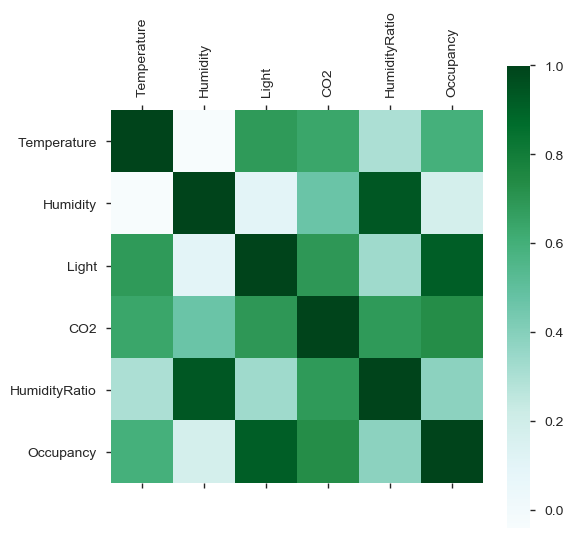

In [6]:
def plot_corr(df, size = 6):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='BuGn')
